In [10]:
%matplotlib inline
import pandas as pd
from sklearn.cluster import KMeans

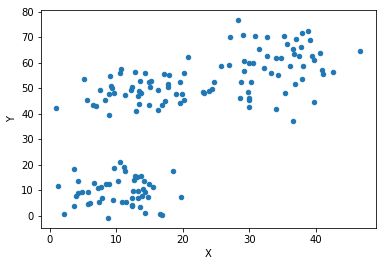

In [17]:
url = 'http://www.lighthouse-w5.com/python/data/test.csv'
data = pd.read_csv(url, index_col=0)

data.columns = ('X', 'Y')
data.plot.scatter(x='X', y='Y')

In [24]:
km = KMeans(n_clusters=3,            # クラスターの個数
            init='random',           # セントロイドの初期値をランダムに設定  default: 'k-means++'
            n_init=1,                # 異なるセントロイドの初期値を用いたk-meansの実行回数 default: '10' 実行したうちもっとSSE値が小さいモデルを最終モデルとして選択
            #max_iter=300,            # k-meansアルゴリズムの内部の最大イテレーション回数  default: '300'
            #tol=1e-04,               # 収束と判定するための相対的な許容誤差 default: '1e-04'
            #random_state=0,          # セントロイドの初期化に用いる乱数発生器の状態
            verbose=1)
km.fit(data)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 10662.9416992
start iteration
done sorting
end inner loop
Iteration 1, inertia 10264.8868294
start iteration
done sorting
end inner loop
Iteration 2, inertia 10231.4523552
start iteration
done sorting
end inner loop
Iteration 3, inertia 10217.2634412
start iteration
done sorting
end inner loop
Iteration 4, inertia 10217.2634412
center shift 0.000000e+00 within tolerance 2.133053e-02


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [25]:
data['label']= km.labels_
data

,X,Y,label
0,28.647873,46.249195,1
1,14.337679,9.119754,0
2,2.090964,0.770655,0
3,32.278441,58.014772,2
4,3.574927,3.752444,0
5,33.345517,56.096035,2
6,37.829710,65.950095,2
7,30.585385,59.846024,2
8,12.763512,56.146730,1
9,37.084972,69.458670,2


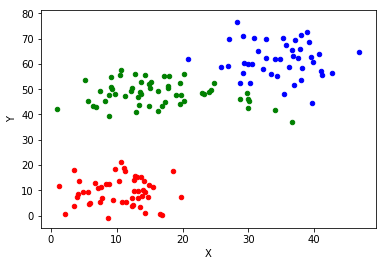

In [26]:
df0 = data.loc[data['label'] == 0, ['X','Y']]
df1 = data.loc[data['label'] == 1, ['X','Y']]
df2 = data.loc[data['label'] == 2, ['X','Y']]

ax = df0.plot.scatter(x='X', y='Y', c='r')
df1.plot.scatter(x='X', y='Y', c='g', ax=ax)
df2.plot.scatter(x='X', y='Y', c='b', ax=ax)


In [27]:
print ('Distortion: %.2f'% km.inertia_)

Distortion: 10217.26


In [30]:
distortions = []

for i  in range(1,11):                # 1~10クラスタまで一気に計算 
    km = KMeans(n_clusters=i,
                init='k-means++',     # k-means++法によりクラスタ中心を選択
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(data)                         # クラスタリングの計算を実行
    distortions.append(km.inertia_)   # km.fitするとkm.inertia_が得られる

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

NameError: name 'plt' is not defined